In [313]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random #generating negative random numbers

from mpl_toolkits.mplot3d import Axes3D # for 3D visualization

from tqdm import tqdm, trange #loading status

import pandas as pd


In [314]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cd

/Users/reuschenbachjosefine


In [6]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [5]:
ls

LICENSE.txt                    pycabnn/
README.md                      requirements.txt
SnipsForEPointOnSphere.ipynb   run_connector.py*
environment.yml                run_connector_MLI.py*
generate_cell_position.py*     start_ipcluster.sh
generate_cell_position_mli.py* temp_arra.npz
movie_figs/                    test_data/
notebooks/                     testsave.npz
optional-requirements.txt      unpack_db.py*


In [315]:
somas=np.loadtxt("test_data/MLI_20000/MLIcoordinates.dat")
# somas = somas['mli']
somas[:5]

array([[ 260.49691676,  240.67988039,  322.96117708],
       [1465.06295851,  597.04816666,  306.79052032],
       [ 472.20029745,  592.2483781 ,  291.51042226],
       [ 244.05444309,  228.43872702,  407.48067531],
       [ 431.83855078,  462.50694568,  413.37245933]])

In [296]:
#import pycabnn.generate_cell_position_mli as pop

In [316]:
from neuron import h
h.load_file('test_data/params/Parameters.hoc')

1.0

In [317]:
import pycabnn.cell_population as pop

In [383]:
mlipop = pop.MLI_pop(h)

In [384]:
somas=somas[0:500]

In [448]:
mlipop.load_somata('test_data/MLI_20000/MLIcoordinates.dat')

Successfully read test_data/MLI_20000/MLIcoordinates.dat.


In [449]:
mlipop.som.shape

(19885, 3)

In [422]:
DendPointAllAll100s, dendpt_ids_all100s, segs100s = mlipop.gen_dendrite()

  3%|▎         | 13/500 [00:00<00:04, 121.26it/s]

Epoint z mid = 100.48971079509094
Epoint z min = 0.12125991506659606
Epoint z max = 199.37904361597197
Soma z mid = 103.17282003799599
Soma z min = 0.5009739039832084
Soma z max = 199.7385823420766
lower 0
upper 200.0


100%|██████████| 500/500 [00:05<00:00, 96.18it/s] 


In [404]:
assert DendPointAllAll100s.shape[0] == dendpt_ids_all100s.shape[0]
assert DendPointAllAll100s.shape[0] == segs100s.shape[0]

In [430]:
mlipop.add_dendrites()

  2%|▏         | 12/500 [00:00<00:04, 119.74it/s]

Epoint z mid = 100.32104945972627
Epoint z min = 0.09811442180779295
Epoint z max = 199.92694578922573
Soma z mid = 103.17282003799599
Soma z min = 0.5009739039832084
Soma z max = 199.7385823420766
lower 0
upper 200.0


100%|██████████| 500/500 [00:05<00:00, 94.73it/s] 


In [431]:
mlipop.dends.coo

array([[260.23939587, 242.5238153 , 323.69164752],
       [259.98187498, 244.3677502 , 324.42211796],
       [259.72435409, 246.21168511, 325.15258839],
       ...,
       [560.31045125, 356.74608821, 347.89703305],
       [560.18830696, 358.56617765, 347.07706037],
       [560.06616267, 360.38626709, 346.25708769]])

In [432]:
mlipop.save_data("testDend500Som2108")

In [441]:
mlipop.dends.idx

array([  0,   0,   0, ..., 499, 499, 499])

In [442]:
test =mlipop.load_data("testDend500Som2108.npz")#,mmap_mode='r')

In [436]:
mlipop.load_data("testDend500Som2108.npz")

In [443]:
for k in test.files:
    print(k)

AttributeError: 'NoneType' object has no attribute 'files'

In [382]:
test['segments']

array([  0,   0,   0, ..., 499, 499, 499])

In [353]:
test['segments']

array([  0,   0,   0, ..., 499, 499, 499])

In [354]:
print(somas)

[[ 260.49691676  240.67988039  322.96117708]
 [1465.06295851  597.04816666  306.79052032]
 [ 472.20029745  592.2483781   291.51042226]
 ...
 [ 768.13479144  217.42855247  293.89873103]
 [ 528.34813819   99.67328476  248.74110214]
 [ 571.05914862  196.57821726  420.05462879]]


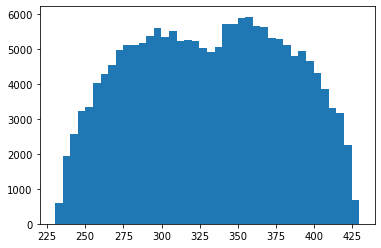

In [217]:
plt.hist(DendPointAllAll100s[:,2],40);

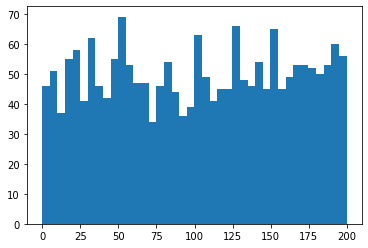

In [192]:
plt.hist(endpts[:,1],40);

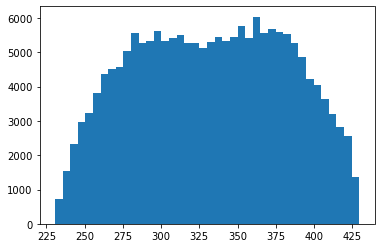

In [202]:
fig, ax = plt.subplots(  )
ax.hist(DendPointAllAll100s[:,2],40);
fig.savefig('DendPointAllAll500s.png')   # save the figure to file
#plt.close(fig)    # close the figure window


In [201]:
somas.shape

(500, 3)

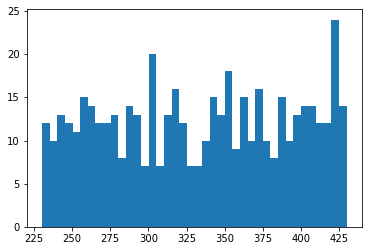

In [203]:
fig, ax = plt.subplots(  )
ax.hist(somas[:,2],40);
fig.savefig('somas500.png')   # save the figure to file


In [187]:
max(somas[:,2])-min(somas[:,2])

199.2376084380934

In [188]:
max(DendPointAllAll100s[:,2])-min(DendPointAllAll100s[:,2])

199.51794471634102

In [149]:
DendPointAllAll19885, dendpt_ids_all19885, segs19885 = mlipop.gen_dendrite(somas)

distance 307.03882291697954
distance 292.96117708302046
distance 323.20947968088205
distance 276.79052031911795
distance 338.4895777395278
distance 261.5104222604722
distance 222.51932468868688
distance 377.4806753113131
distance 216.62754066934212
distance 383.3724593306579
distance 244.36706405308956
distance 355.63293594691044
distance 352.0200036479921
distance 247.9799963520079
distance 290.444037054125
distance 309.555962945875
distance 313.6736129503819
distance 286.3263870496181
distance 379.7077455754214
distance 220.29225442457857
distance 265.67427783798985
distance 334.32572216201015
distance 314.3025492931062
distance 285.6974507068938
distance 229.2069880280235
distance 370.7930119719765
distance 349.25445646606454
distance 250.74554353393546
distance 231.66244325275068
distance 368.3375567472493
distance 273.4052202882979
distance 326.5947797117021
distance 329.7888358195874
distance 270.2111641804126
distance 298.18503784243825
distance 301.81496215756175
distance 388.8

  0%|          | 0/500 [00:00<?, ?it/s]

 286.81032928271645
distance 313.18967071728355
distance 232.98534036418897
distance 367.01465963581103
distance 326.80632838795884
distance 273.19367161204116
distance 232.75401134133426
distance 367.24598865866574
distance 326.3921818353983
distance 273.6078181646017
distance 356.0956995327903
distance 243.90430046720968
distance 282.3259989470044
distance 317.6740010529956
distance 325.61860212354895
distance 274.38139787645105
distance 285.50948622989995
distance 314.49051377010005
distance 209.83079273339558
distance 390.1692072666044
distance 231.78709235607818
distance 368.2129076439218
distance 277.8318857022138
distance 322.1681142977862
distance 372.4760374584456
distance 227.5239625415544
distance 233.0711285987087
distance 366.9288714012913
distance 258.92300807156244
distance 341.07699192843756
distance 381.522239189188
distance 218.47776081081201
distance 391.3486698583695
distance 208.65133014163055
distance 310.57918571945464
distance 289.42081428054536
distance 345.823

100%|██████████| 500/500 [00:05<00:00, 85.41it/s] 


ValueError: too many values to unpack (expected 3)

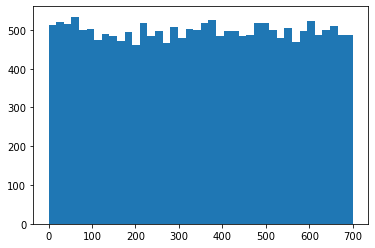

In [149]:
plt.hist(somas[:,1],40);

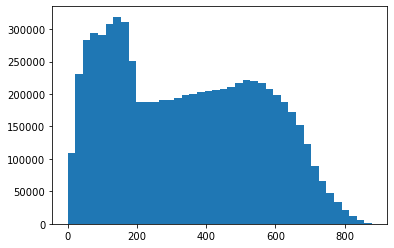

In [131]:
plt.hist(DendPointAllAll19885[:,1], 40);

In [114]:
DendPointAllAll500, dendpt_ids_all500, segs500 = mlipop.gen_dendrite(somas)

100%|██████████| 500/500 [00:05<00:00, 96.49it/s] 


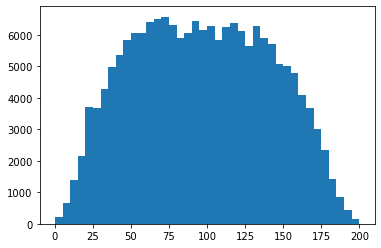

In [115]:
plt.hist(DendPointAllAll500[:,1], 40);

In [86]:
DendPointAllAll, dendpt_ids_all, segs = mlipop.gen_dendrite(somas)

100%|██████████| 60/60 [00:00<00:00, 125.37it/s]


In [89]:
DendPointAllAll.shape[0]/somas.shape[0]

360.0

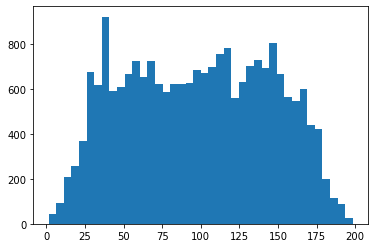

In [98]:
plt.hist(DendPointAllAll[:,1], 40);

In [124]:
mlipop.load_somata(somas)

In [116]:
mlipop.load_data('testsave.npz')

In [117]:
somas.shape

(500, 3)

In [71]:
DendPointAllAll, dendpt_ids_all, segs = mlipop.gen_dendrite(somas, return_end_points=False)

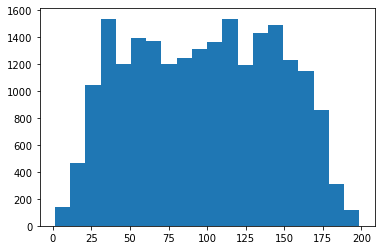

In [105]:
plt.hist(DendPointAllAll[:,1], 20);

In [102]:
somas.shape

(60, 3)

#### Import npz file and check attributes

In [5]:
cd 

/Users/reuschenbachjosefine


In [6]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI


/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [245]:
MLI=np.load("test_data/MLI_20000/MLIdata_20210705.npz", mmap_mode='r')

In [246]:
for k in MLI.files:
    print(k)

dendpoints
segments
ids


In [247]:
DendPointAllAll= MLI["dendpoints"]
segs_all= MLI["segments"]
dendpt_ids_all= MLI["ids"]

In [248]:
dendpt_ids_all

array([    0,     0,     0, ..., 19884, 19884, 19884])

#### Query Point

In [11]:
cd

/Users/reuschenbachjosefine


In [12]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn


In [13]:
import util as util

In [14]:
qpts = util.Query_point(DendPointAllAll, dendpt_ids_all, segs_all)

In [15]:
dendpts100 = qpts.coo[qpts.idx<100,:]
ids100 = qpts.idx[qpts.idx<100]
seg100 = qpts.seg[qpts.idx<100,:]

In [16]:
seg100.shape

(36000, 2)

## Connector Results

In [7]:
cd ..

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [8]:
ls

LICENSE.txt                    pycabnn/
README.md                      requirements.txt
SnipsForEPointOnSphere.ipynb   run_connector.py*
environment.yml                run_connector_MLI.py*
generate_cell_position.py*     start_ipcluster.sh
generate_cell_position_mli.py* temp_arra.npz
movie_figs/                    test_data/
notebooks/                     testsave.npz
optional-requirements.txt      unpack_db.py*


In [9]:
gc = np.loadtxt('test_data/cell_position/GCcoordinates.dat')

In [10]:
import pandas as pd

In [11]:
tb = pd.read_hdf('../connection_test_20210707/AAtoMLI.h5', "connection")
tb

,source,target,segment,branch,distance
0,362237,0,1,0,124.820050
1,14223,0,1,0,217.820050
2,772002,0,1,0,168.820050
3,131434,0,1,0,204.820050
4,582204,0,1,0,210.820050
...,...,...,...,...,...
983587,271047,99,4,9,72.738357
983588,774330,99,4,9,81.738357
983589,711250,99,4,9,176.738357
983590,694731,99,4,9,162.738357


In [40]:
dist = np.sqrt((gc[362237,0]-dendpts100[0,0])**2 + 
               (gc[362237,1]-dendpts100[0,1])**2 + 
               (gc[362237,2]-dendpts100[0,2])**2)
dist

124.88786641906866

In [41]:
GCcellAll_001=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==0) and (tb.branch[i]==0) and (tb.segment[i]==1): #segment is acutally branch 
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_001.extend(GCcell)





In [42]:
GCcoor_All_001=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_001)):
    GCcoor_001=(gc[GCcellAll_001[i]])
    GCcoor_All_001 = np.vstack((GCcoor_All_001 ,GCcoor_001))


In [43]:
MLIcellAll_001=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==0):
        MLIcell= np.array(dendpts100[i])
        MLIcellAll_001 = np.vstack((MLIcellAll_001, MLIcell))




In [44]:
seg100

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [4, 9],
       [4, 9],
       [4, 9]])

In [45]:
somas[:,0]

array([ 260.49691676, 1465.06295851,  472.20029745, ...,  246.18660025,
       1195.12771213, 1441.1328444 ])

100%|██████████| 360/360 [00:38<00:00,  9.31it/s]


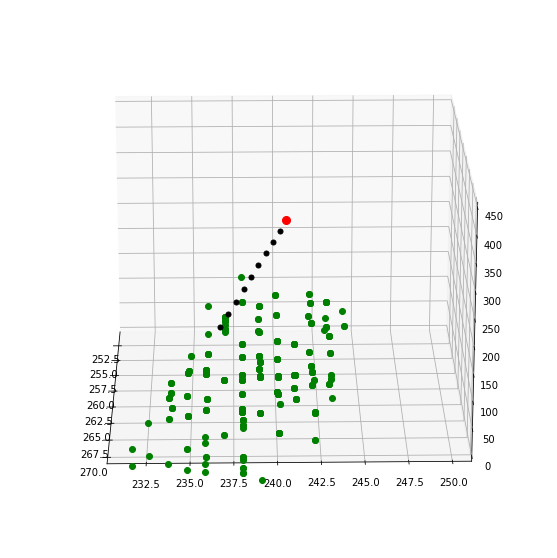

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_All_001[:,0], GCcoor_All_001[:,1], GCcoor_All_001[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_001[:,0], MLIcellAll_001[:,1], MLIcellAll_001[:,2],'ok', markersize=5)
ax.set(xlim=np.array([-10, 10])+somas[0,0], 
       ylim=np.array([-10, 10])+somas[0,1],
       zlim=[0, 450])

for ii in trange(0,360,1):
    ax.view_init(elev=20., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [47]:
GCcellAll_091=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==0) and (tb.branch[i]==9) and (tb.segment[i]==1):
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_091.extend(GCcell)

In [48]:
GCcoor_091_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_091)):
    GCcoor_091=(gc[GCcellAll_091[i]])
    GCcoor_091_All = np.vstack((GCcoor_091_All ,GCcoor_091))

In [49]:
MLIcellAll_091=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_091 = np.vstack((MLIcellAll_091 ,MLIcell))





In [50]:
MLIcellAll_091

array([[420.25519607141223, 205.4751777426792, 311.3887485681651],
       [422.20346777037753, 205.04585210063118, 311.24762139115467],
       [424.15173946934283, 204.61652645858317, 311.1064942141443],
       [426.10001116830813, 204.18720081653515, 310.96536703713383],
       [428.04828286727343, 203.75787517448714, 310.8242398601234],
       [429.99655456623873, 203.32854953243913, 310.683112683113],
       [431.94482626520403, 202.8992238903911, 310.54198550610255],
       [433.8930979641693, 202.46989824834307, 310.4008583290921],
       [435.8413696631346, 202.04057260629506, 310.2597311520817]],
      dtype=object)

100%|██████████| 360/360 [00:27<00:00, 13.16it/s]


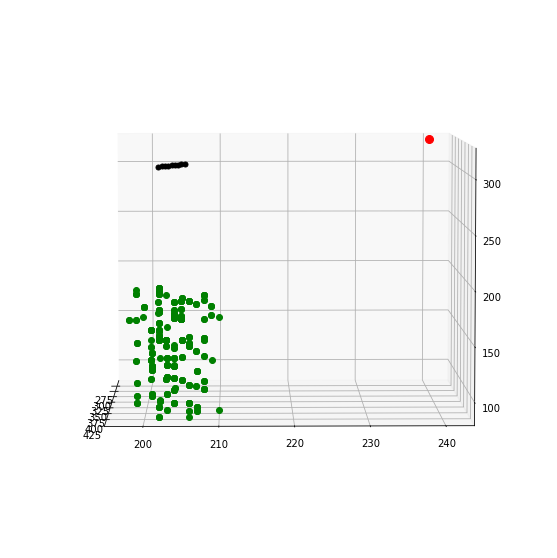

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_091_All[:,0], GCcoor_091_All[:,1], GCcoor_091_All[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_091[:,0], MLIcellAll_091[:,1], MLIcellAll_091[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

### PF to MLI

In [12]:
pf = pd.read_hdf('../connection_test_20210707/PFtoMLI.h5', "connection")
pf

,source,target,segment,branch,distance
0,603191,0,1,0,1029.554812
1,389935,0,1,0,391.554812
2,457648,0,1,0,828.554812
3,463007,0,1,0,828.554812
4,496893,0,1,0,290.445188
...,...,...,...,...,...
13192038,732684,99,4,9,1215.786000
13192039,650855,99,4,9,1203.786000
13192040,795727,99,4,9,320.214000
13192041,397990,99,4,9,1006.786000


In [13]:
GCcellAll_091_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==0) and (pf.branch[i]==9) and (pf.segment[i]==1):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_091_PF.extend(GCcell)

In [14]:
GCcoor_091_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_091_PF)):
    GCcoor_091=(gc[GCcellAll_091_PF[i]])
    GCcoor_091_All_PF = np.vstack((GCcoor_091_All_PF ,GCcoor_091))

In [55]:
MLIcellAll_091_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_091_PF = np.vstack((MLIcellAll_091_PF ,MLIcell))






100%|██████████| 360/360 [00:31<00:00, 11.35it/s]


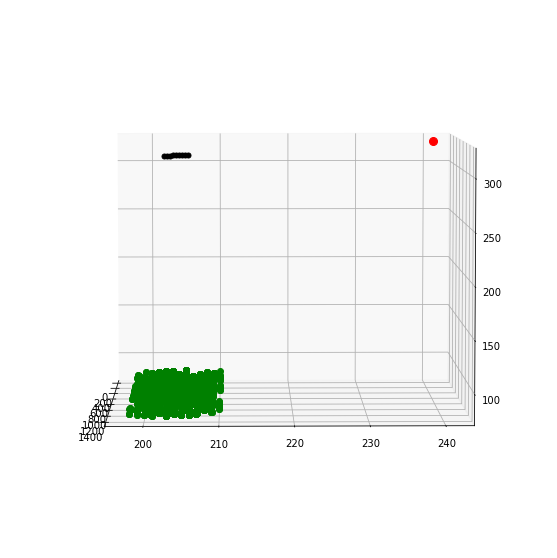

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_091_All_PF[:,0], GCcoor_091_All_PF[:,1], GCcoor_091_All_PF[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_091_PF[:,0], MLIcellAll_091_PF[:,1], MLIcellAll_091_PF[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [57]:
GCcellAll_45_5_3_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==45) and (pf.branch[i]==5) and (pf.segment[i]==3):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_45_5_3_PF.extend(GCcell)

In [58]:
GCcoor_45_5_3_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_45_5_3_PF)):
    GCcoor_45_5_3=(gc[GCcellAll_45_5_3_PF[i]])
    GCcoor_45_5_3_All_PF = np.vstack((GCcoor_45_5_3_All_PF ,GCcoor_45_5_3))

In [59]:
MLIcellAll_45_5_3_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==45) and (seg100[i,0]==3) and (seg100[i,1]==5):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_45_5_3_PF = np.vstack((MLIcellAll_45_5_3_PF ,MLIcell))







In [60]:
MLIcellAll_45__3_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==45) and (seg100[i,0]==3):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_45__3_PF = np.vstack((MLIcellAll_45__3_PF ,MLIcell))


In [61]:
MLIcellAll_45__3_PF.shape

(90, 3)

100%|██████████| 360/360 [00:35<00:00, 10.17it/s]


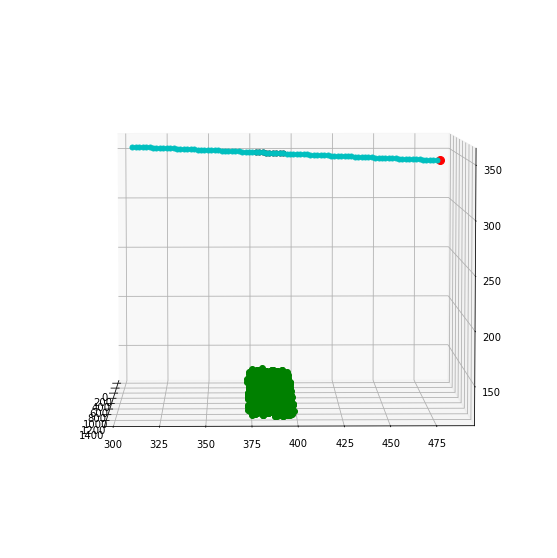

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_45_5_3_All_PF[:,0], GCcoor_45_5_3_All_PF[:,1], GCcoor_45_5_3_All_PF[:,2],'og')
ax.plot(somas[45,0], somas[45,1], somas[45,2],'or', markersize=8)
ax.plot(MLIcellAll_45_5_3_PF[:,0], MLIcellAll_45_5_3_PF[:,1], MLIcellAll_45_5_3_PF[:,2],'ok', markersize=5)
ax.plot(MLIcellAll_45__3_PF[:,0], MLIcellAll_45__3_PF[:,1], MLIcellAll_45__3_PF[:,2],'oc', markersize=5)


for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

In [129]:
GCcellAll_87_2_4_PF=[]
for  i in range(len(pf.source)):
    if (pf.target[i]==87) and (pf.branch[i]==2) and (pf.segment[i]==4):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_87_2_4_PF.extend(GCcell)
        
GCcoor_87_2_4_All_PF=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll_87_2_4_PF)):
    GCcoor_87_2_4=(gc[GCcellAll_87_2_4_PF[i]])
    GCcoor_87_2_4_All_PF = np.vstack((GCcoor_87_2_4_All_PF ,GCcoor_87_2_4))  


In [123]:
MLIcellAll_87_2_4_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==87) and (seg100[i,0]==4) and (seg100[i,1]==2):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_87_2_4_PF = np.vstack((MLIcellAll_87_2_4_PF ,MLIcell))








In [127]:
seg100

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [4, 9],
       [4, 9],
       [4, 9]])

100%|██████████| 360/360 [00:35<00:00, 10.22it/s]


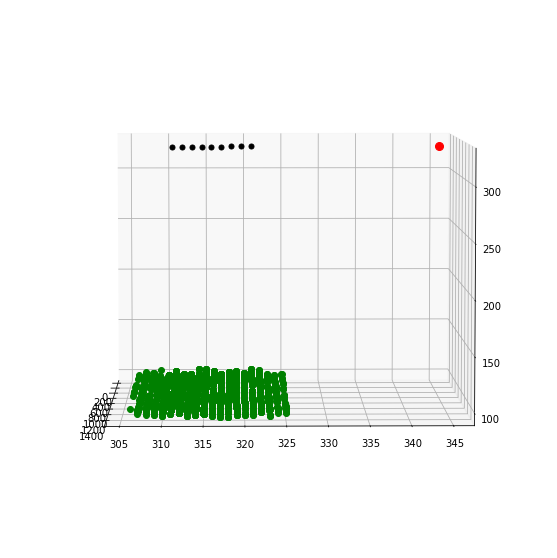

In [130]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_87_2_4_All_PF[:,0], GCcoor_87_2_4_All_PF[:,1], GCcoor_87_2_4_All_PF[:,2],'og')
ax.plot(somas[87,0], somas[87,1], somas[87,2],'or', markersize=8)
ax.plot(MLIcellAll_87_2_4_PF[:,0], MLIcellAll_87_2_4_PF[:,1], MLIcellAll_87_2_4_PF[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs_1/movie%d.png" % ii)

#### Amount of connections?

In [15]:
nsource_pf = pf.groupby('target').count().source

In [16]:
pf[pf.target==0].shape

(138191, 5)

In [17]:
nsource_pf.mean()

131920.43

In [18]:
nsource_aa = tb.groupby('target').count().source
nsource_aa.mean()

9835.92

## 2micro AA to MLI

In [19]:
aa2 = pd.read_hdf('../connection_test_dist2_20210715 _first/AAtoMLI.h5', "connection")
aa2

,source,target,segment,branch,distance
0,196070,0,1,0,124.820050
1,447092,0,1,0,152.820050
2,704666,0,1,0,123.678923
3,639254,0,1,0,218.537796
4,240744,0,1,0,153.537796
...,...,...,...,...,...
39237,699303,99,4,9,153.063641
39238,271047,99,4,9,73.063641
39239,421237,99,4,9,192.900999
39240,774330,99,4,9,81.900999


In [30]:
##Amount of connections from one MLI to AAs
nsource_aa2 = aa2.groupby('target').count().source
nsource_aa2.mean()

392.42

## 2microm PF to MLI

In [31]:
pf2 = pd.read_hdf('../connection_test_dist2_20210715 _first/PFtoMLI.h5', "connection")
pf2

,source,target,segment,branch,distance
0,489132,0,1,0,424.554812
1,187803,0,1,0,1033.554812
2,220640,0,1,0,830.554812
3,751902,0,1,0,938.554812
4,2214,0,1,0,372.445188
...,...,...,...,...,...
2110173,375491,99,4,9,1050.786000
2110174,140751,99,4,9,1084.786000
2110175,522445,99,4,9,518.786000
2110176,4112,99,4,9,1159.786000


In [32]:
##Amount of connections from one MLI to PFs
nsource_pf2 = pf2.groupby('target').count().source
nsource_pf2.mean()

21101.78

## 1microm AA to MLI

In [21]:
aa1 = pd.read_hdf('../connection_test_dist1_20210715/AAtoMLI.h5', "connection")
aa1

,source,target,segment,branch,distance
0,196070,0,1,0,124.820050
1,447092,0,1,0,152.820050
2,704666,0,1,0,123.678923
3,639254,0,1,0,218.537796
4,240744,0,1,0,153.537796
...,...,...,...,...,...
39237,699303,99,4,9,153.063641
39238,271047,99,4,9,73.063641
39239,421237,99,4,9,192.900999
39240,774330,99,4,9,81.900999


In [22]:
##Amount of connections from one MLI to PFs
nsource_aa1 = aa1.groupby('target').count().source
nsource_aa1.mean()

392.42

In [23]:
type(nsource_aa1)

pandas.core.series.Series

## 1microm PF to MLI

In [24]:
pf1 = pd.read_hdf('../connection_test_dist1_20210715/PFtoMLI.h5', "connection")
pf1

,source,target,segment,branch,distance
0,2214,0,1,0,372.445188
1,1928,0,1,0,624.554812
2,119702,0,1,0,1158.554812
3,232164,0,1,0,1053.554812
4,238986,0,1,0,1132.554812
...,...,...,...,...,...
527141,79202,99,4,9,864.786000
527142,22744,99,4,9,612.786000
527143,60625,99,4,9,1147.786000
527144,611573,99,4,9,231.786000


In [25]:
##Amount of connections from one MLI to PFs
nsource_pf1 = pf1.groupby('target').count().source
nsource_pf1.mean()

5271.46

## 0.5 microm AA to MLI

In [26]:
aa05 = pd.read_hdf('../connection_test_dist05_20210715/AAtoMLI.h5', "connection")
aa05

,source,target,segment,branch,distance
0,8645,0,1,0,170.396668
1,68383,0,1,1,200.549905
2,221483,0,1,1,150.408778
3,124025,0,1,1,199.408778
4,63845,0,1,1,140.408778
...,...,...,...,...,...
9625,724214,99,4,8,223.527417
9626,54284,99,4,9,164.039492
9627,18903,99,4,9,179.714208
9628,341606,99,4,9,176.226283


In [27]:
##Amount of connections from one MLI to PFs
nsource_aa05 = aa05.groupby('target').count().source
nsource_aa05.mean()

96.3

## 0.5 microm PF to MLI

In [28]:
pf05 = pd.read_hdf('../connection_test_dist05_20210715/PFtoMLI.h5', "connection")
pf05

,source,target,segment,branch,distance
0,1928,0,1,0,624.554812
1,5168,0,1,0,399.554812
2,717609,0,1,0,274.445188
3,1928,0,1,0,622.606540
4,5168,0,1,0,397.606540
...,...,...,...,...,...
131632,412158,99,4,9,302.786000
131633,79202,99,4,9,864.786000
131634,22744,99,4,9,612.786000
131635,611573,99,4,9,231.786000


In [29]:
pf05.shape

(131637, 5)

In [30]:
##Amount of connections from one MLI to PFs
nsource_pf05 = pf05.groupby('target').count().source
nsource_pf05.mean()

1316.37

In [31]:
type(nsource_pf05)

pandas.core.series.Series

## AA to MLI ALL(?) 0.5 microm

In [32]:
aa05All = pd.read_hdf('../AAtoMLI.h5', "connection")
aa05All

,source,target,segment,branch,distance
0,0,2301,3,4,210.911285
1,0,14367,3,9,61.630676
2,1,11718,1,5,196.484736
3,1,11640,3,4,216.168046
4,1,15245,2,3,208.676976
...,...,...,...,...,...
1966291,797998,5090,2,2,204.763448
1966292,797998,11846,4,9,166.209174
1966293,797998,19133,1,1,182.170002
1966294,797999,8449,2,8,116.094155


In [33]:
aa05.shape

(9630, 5)

In [34]:
aa05All.shape

(1966296, 5)

In [35]:
##Amount of connections from one MLI to PFs
nsource_aa05All = aa05All.groupby('target').count().source
nsource_aa05All.mean()

99.10266619626027

## PF to MLI ALL(?) 0.5 microm

In [36]:
pf05All = pd.read_hdf('../PFtoMLI.h5', "connection")
pf05All

,source,target,segment,branch,distance
0,0,18144,4,3,471.064672
1,0,7737,4,2,1051.431538
2,0,5079,2,0,949.246210
3,0,11817,3,4,413.066254
4,0,5794,2,2,613.430512
...,...,...,...,...,...
25823890,797999,8924,2,3,259.295904
25823891,797999,2301,1,7,576.378981
25823892,797999,19353,2,2,1170.162154
25823893,797999,5802,1,5,435.021990


In [37]:
pf05All.shape

(25823895, 5)

In [38]:
pf05.shape

(131637, 5)

In [39]:
##Amount of connections from one MLI to PFs
nsource_pf05All = pf05All.groupby('target').count().source
nsource_pf05All.mean()

1298.6620568267538

## AA to MLI ALL(?) 1 microm

In [45]:
cd ..


/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [47]:
cd ..

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit


In [49]:
cd AllConnections1mim/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/AllConnections1mim


In [50]:
aa1All = pd.read_hdf('AAtoMLI_ALL1.h5', "connection")
aa1All

,source,target,segment,branch,distance
0,0,18196,4,1,169.483676
1,0,5865,1,7,176.738375
2,0,555,3,8,227.387419
3,0,10213,1,8,149.841799
4,0,15632,1,0,222.835452
...,...,...,...,...,...
7876852,797999,16966,3,0,167.608983
7876853,797999,14600,2,3,200.965451
7876854,797999,12394,1,0,58.745805
7876855,797999,17419,1,0,149.990722


In [51]:
##Amount of connections from one MLI to PFs
nsource_aa1All = aa1All.groupby('target').count().source
nsource_aa1All.mean()

396.2799718267344

In [103]:
nsource_aa1All

target
0        488
1        306
2        599
3         57
4         56
        ... 
19880    412
19881    839
19882    850
19883    220
19884    225
Name: source, Length: 19877, dtype: int64

## PF to MLI ALL(?) 1 microm

In [52]:
cd ..

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit


In [53]:
cd AllConnections1mim/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/AllConnections1mim


In [54]:
ls

AAtoMLI_ALL1.h5  PFtoMLI_ALL1.h5


In [55]:
pf1All = pd.read_hdf('PFtoMLI_ALL1.h5', "connection")
pf1All

,source,target,segment,branch,distance
0,0,14454,2,5,336.899211
1,0,2156,2,1,672.125102
2,0,6771,2,6,484.129207
3,0,14792,4,7,385.203282
4,0,3843,2,5,881.165922
...,...,...,...,...,...
103283194,797999,11015,1,3,293.935840
103283195,797999,15189,1,2,313.934178
103283196,797999,11221,1,6,969.138216
103283197,797999,4803,1,8,301.359777


In [56]:
pf1All.shape

(103283199, 5)

In [57]:
##Amount of connections from one MLI to PFs
nsource_pf1All = pf1All.groupby('target').count().source
nsource_pf1All.mean()

5194.025597183807

## Boxplot PF

In [58]:
pf05_nSource=np.array([nsource_pf05])
pf05_nSource=np.reshape(pf05_nSource, [100, 1])
pf05_nSource.shape

(100, 1)

In [59]:
pf1_nSource=np.array([nsource_pf1])
pf1_nSource=np.reshape(pf1_nSource, [100, 1])
pf1_nSource.shape

(100, 1)

In [60]:
pf2_nSource=np.array([nsource_pf2])
pf2_nSource=np.reshape(pf2_nSource, [100, 1])
pf2_nSource.shape

NameError: name 'nsource_pf2' is not defined

In [61]:
#merge all PF settings in one array
nSourceAll=np.concatenate((pf05_nSource, pf1_nSource, pf2_nSource), axis=1)
nSourceAll.shape

NameError: name 'pf2_nSource' is not defined

In [62]:
pf05_nSource[0:5]

array([[1316],
       [ 951],
       [1450],
       [1110],
       [ 983]])

In [63]:
print(nsource_pf05.mean(),nsource_pf1.mean(), nsource_pf2.mean())

NameError: name 'nsource_pf2' is not defined

In [64]:

df = pd.DataFrame(nSourceAll, columns=['PF_0.5', 'PF_1', 'PF_2'])
ax = df.plot.box()


NameError: name 'nSourceAll' is not defined

## Boxplot PF and AA 0.5

In [65]:
aa05_nSource=np.array([nsource_aa05])
aa05_nSource=np.reshape(aa05_nSource, [100, 1])
aa05_nSource.shape

(100, 1)

In [66]:
#merge PF  and AA in one array
nSource05=np.concatenate((pf05_nSource, aa05_nSource), axis=1)
nSource05.shape

(100, 2)

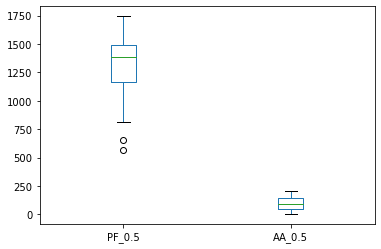

In [67]:
df = pd.DataFrame(nSource05, columns=['PF_0.5', 'AA_0.5'])
ax = df.plot.box()

In [68]:
aa05_nSource=np.array([nsource_aa05])
aa05_nSource=np.reshape(aa05_nSource, [100, 1])
aa05_nSource.shape

(100, 1)

In [69]:
aa05_nSource.shape

(100, 1)

In [70]:
nsource_aa05.shape

(100,)

In [71]:
nsource_aa1All.shape[0]

19877

## Boxplot ALL vs 100

In [104]:
aa1All_nSource=np.array([nsource_aa1All])
aa1All_nSource=np.reshape(aa1All_nSource, [nsource_aa1All.shape[0], 1])
aa1All_nSource.shape
target_aa = np.array(nsource_aa1All.index)

(1, 19877)

In [112]:
pf1All_nSource=np.array([nsource_pf1All])
pf1All_nSource=np.reshape(pf1All_nSource, [nsource_pf1All.shape[0], 1])
target_pf = np.array(nsource_pf1All.index)

In [74]:
type(pf1All_nSource)

numpy.ndarray

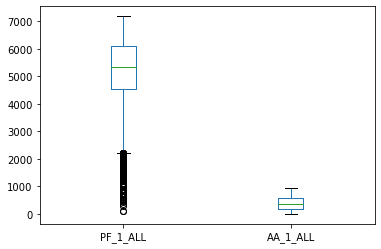

In [75]:

d = {'PF_1_ALL': pf1All_nSource, 'AA_1_ALL': aa1All_nSource}
df = pd.concat([pd.DataFrame(v, columns=[k]) for k, v in d.items()], axis=1)

#print(df)
ax = df.plot.box()


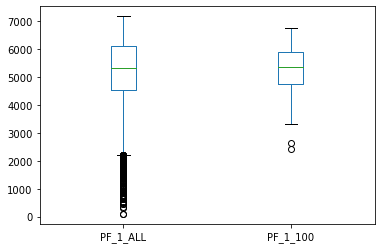

In [76]:
d = {'PF_1_ALL': pf1All_nSource, 'PF_1_100': pf1_nSource}
df = pd.concat([pd.DataFrame(v, columns=[k]) for k, v in d.items()], axis=1)

#print(df)
ax = df.plot.box()

In [77]:
aa1_nSource=np.array([nsource_aa1])
aa1_nSource=np.reshape(aa1_nSource, [100, 1])
aa1_nSource.shape

(100, 1)

In [83]:
aa1_nSource.ravel()

array([498, 304, 594,  62,  35, 228, 585, 333, 495, 446, 230, 488, 104,
       442, 135, 303, 546, 364, 786, 356, 507, 563, 689, 304, 368, 727,
       369,  56, 830, 316, 291, 213, 710, 426, 782,  34, 462, 572, 187,
       701, 636,  55, 225, 202, 259, 317, 143,  87, 297, 139, 739, 572,
        27, 736, 209, 631, 252, 526, 587, 219, 734, 189, 686, 364, 419,
       452, 675, 394, 201, 184, 463, 464, 584, 159, 334, 531, 173, 247,
       496, 463, 100, 183, 652, 685, 231, 703, 727, 399,  24,  57, 818,
       144, 109, 486, 117,  16, 408, 624, 761, 487])

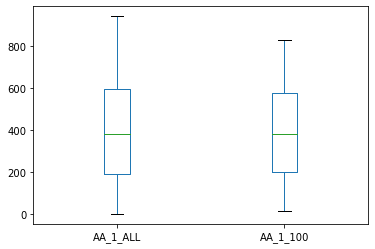

In [79]:
d = {'AA_1_ALL': aa1All_nSource, 'AA_1_100': aa1_nSource}
df = pd.concat([pd.DataFrame(v, columns=[k]) for k, v in d.items()], axis=1)

#print(df)
ax = df.plot.box()

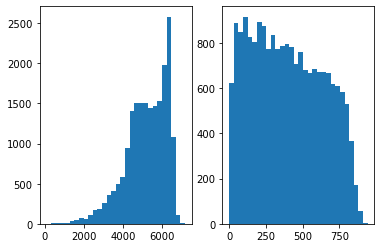

In [91]:
npf = pf1All_nSource[:,0]
naa = aa1All_nSource[:,0]
_, axs = plt.subplots(ncols=2)
axs[0].hist(npf,30);
axs[1].hist(naa, 30);

In [99]:
xyz = np.loadtxt('../pycabnn-MLI/test_data/MLI_20000/MLIcoordinates.dat')

In [102]:
print(xyz.shape[0], naa.shape[0])

19885 19877


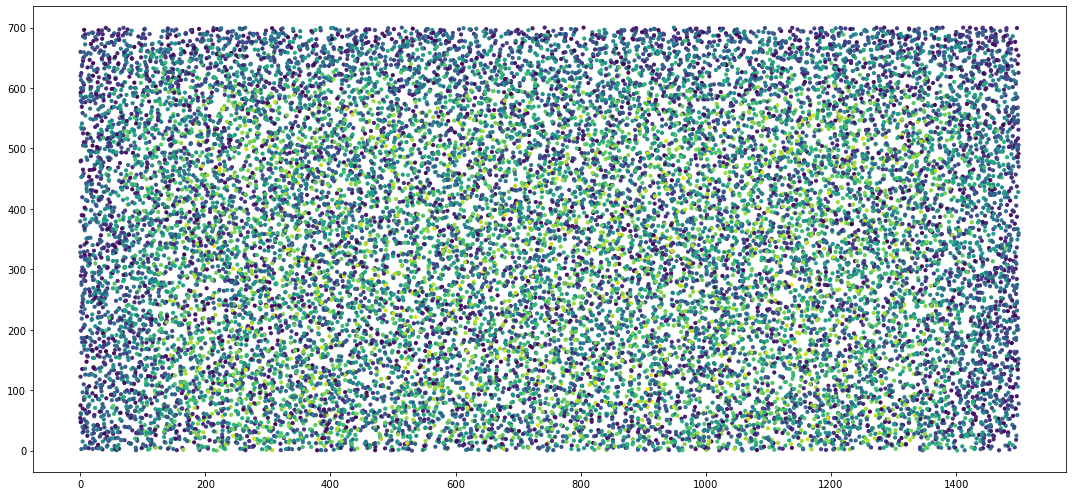

In [118]:
_, ax = plt.subplots(figsize=(15,7))
plt.scatter(xyz[target_aa,0], xyz[target_aa,1], 10, naa)
plt.tight_layout()

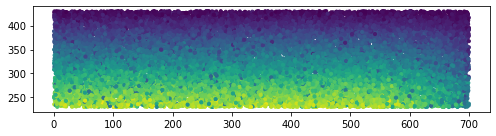

In [121]:
_, ax = plt.subplots(figsize=(7,2))
plt.scatter(xyz[target_aa,1], xyz[target_aa,2], 10, naa)
plt.tight_layout()

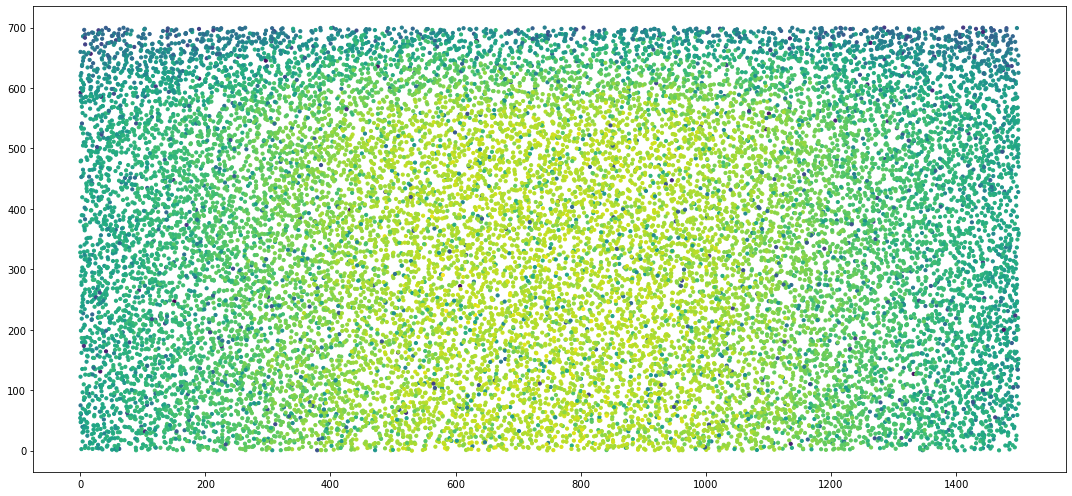

In [119]:
_, ax = plt.subplots(figsize=(15,7))
plt.scatter(xyz[target_pf,0], xyz[target_pf,1], 10, npf)
plt.tight_layout()

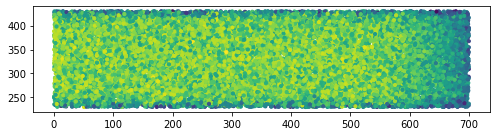

In [120]:
_, ax = plt.subplots(figsize=(7,2))
plt.scatter(xyz[target_pf,1], xyz[target_pf,2], 10, npf)
plt.tight_layout()

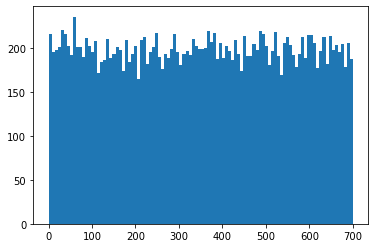

In [126]:
plt.hist(xyz[:,1], 100);

In [134]:
xyz_d = np.load('../pycabnn-MLI/test_data/MLI_20000/MLIdata_20210705.npz')
xyz_d = xyz_d['dendpoints']

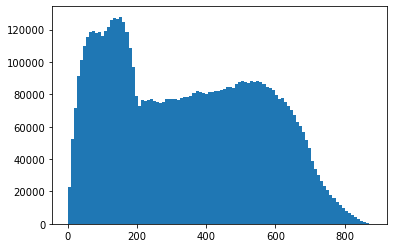

In [153]:
plt.hist(xyz_d[:,1], 100);